In [3]:
import sys
sys.path.append('..')

import sympy
import numpy as np
from copy import deepcopy
import pandas as pd
from eulera_methods import ExplicitEuleraMethod, Method, TableFucntion, EuleraCauchyMethod, ImprovedEuleraMethod
from runge_kutta_method import RungeKuttaMethod
from adams_method import AdamsBashfortsMoultonMethod, AdamsMethod
import matplotlib.pyplot as plt

In [9]:
from math import exp


2.718281828459045

In [10]:
x,y,z = sympy.symbols('x,y,z')
step = 0.1



func = {
    y: z,
    z:z*(x+1)/x + 2*y*(x-1)/x
}
f_real = sympy.exp(2*x)/(3*exp(2)) + (3*x + 1)*sympy.exp(-x)/(3*exp(1))

# func = {
#     y: z,
#     z:(1+2*sympy.tan(x)**2)*y
# }
# f_real = 1/sympy.cos(x) + sympy.sin(x) + x/sympy.cos(x)
sdata = {
    x:1,
    y:1,
    z:1
}
section = [1,2]         
parametrs_class_obj = {
    'step':step,
    'section': section
}
parametrs_for_solve = {
    'func_dict':func,
    'sdata_dict':sdata,
    'ans_vars':(x,y)
}
steps = [0.1,0.05]
methods = [EuleraCauchyMethod, RungeKuttaMethod, AdamsBashfortsMoultonMethod]
# methods = [RungeKuttaMethod]

Precision Ronge-Runberga - Eulera Cauchy Method :
List:[0.486219622351183 0.527556351099951 0.578491222701198 0.641607127513228
 0.719954452796481 0.817167544900721 0.937604790676471 1.08651771044661
 1.27025560538587 1.49651370807324 1.77463450144631]
mean:0.939683876126479
Precision Ronge-Runberga - Runge Kutta Method :
List:[0.486219622351183 0.528211910546853 0.580077822102719 0.644488183321533
 0.724607640846792 0.824218157380242 0.947868036229662 1.10105234341769
 1.29043187060834 1.52409934155660 1.81190347194735]
mean:0.951198036391724
Precision Ronge-Runberga - Adams Bashforts Moulton Method :
List:[0.486219622351183 0.528211910546853 0.580077883661722 0.644488406131166
 0.724611056859602 0.824226101131258 0.947882137022618 1.10107482781951
 1.29046567529771 1.52414831731319 1.81197264340279]
mean:0.951216234685237


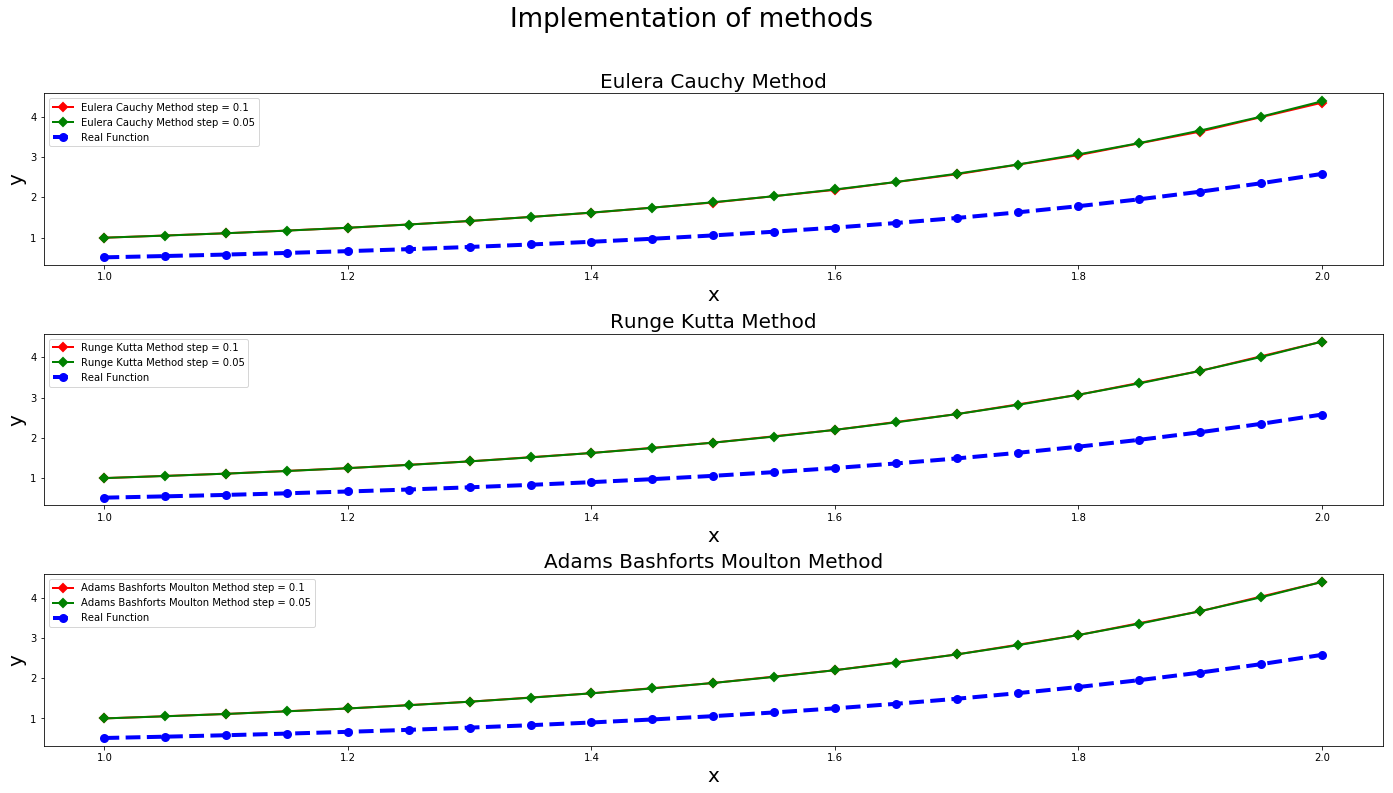

In [11]:
nrows = len(methods)
ncols = len(steps)
color_step = ['red', 'green']
fig, axs = plt.subplots(nrows=nrows,ncols=1,figsize = (24,12))
plt.subplots_adjust(wspace=0.1, hspace=0.4)
fig.suptitle('Implementation of methods',size = 26)
for i,Method in enumerate(methods):
    table_fucntions = []
    for j,step in enumerate(steps):
        parametrs_class_obj['step'] = step
        method  = Method(**parametrs_class_obj)
        table_function = method.solve(**parametrs_for_solve)
        table_fucntions.append(table_function)
        axs[i].plot(
            table_function.table[x].values,
            table_function.table[y].values,
            marker = 'D',
            markeredgewidth=2,
            color = color_step[j],
            linewidth= 2,
            label = f'{Method.name} step = {step}'
        )
        
    f_real_values =np.array([f_real.subs(dict(zip(table_function.varibals, [xi]))) for xi in table_function.table[x].values]) 
    axs[i].plot(
            table_function.table[x].values,
            f_real_values,
            marker = 'o',
            markeredgewidth=3,
            linestyle='--',
            color = 'blue',
            linewidth= 4,
            label="Real Function"
        )
    axs[i].set_title(f'{Method.name}',size = 20)
    axs[i].set_xlabel('x',size=20)
    axs[i].set_ylabel('y',size=20)
    axs[i].legend()
    F_rung,x_vec,eps_rung = Method.precision_runberg(f_real, table_fucntions[0],table_fucntions[1],2,2)
    print(f'Precision Ronge-Runberga - {Method.name} :\nList:{eps_rung}\nmean:{np.mean(eps_rung)}')